First, I imported all the libraries I need such as panadas,matplotlib and sns for visualization, then I loaded the StudentsPerformance csv file I got from kaggle, I also viewed the first 5 data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

exam_scores = pd.read_csv('StudentsPerformance.csv')
exam_scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


The next line of codes were used to eyeball the dataset to check if there are missing data in the columns, the shape,
a general summary statistics of the dataset

In [2]:
exam_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
exam_scores.shape

(1000, 8)

In [4]:
exam_scores.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
exam_scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


I called on the .columns attribute to inspect the columns and I noticed the column names had spaces which is bad for data 
manipulation.

In [6]:
exam_scores.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

I went on to replace the spaces with an underscore so I could eaisly manipulate the column names

In [7]:
exam_scores.columns = exam_scores.columns.str.replace(' ','_')

In [8]:
exam_scores.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

I wanted to see the influence parental level of education played on the students score, so I used the pivot table which takes
the mean values of the students scores in each parents educational level category and stored in a variable.

In [9]:
parent_level = exam_scores.pivot_table(values = ['math_score', 'reading_score', 'writing_score'], index = 'parental_level_of_education')
parent_level.head()

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708


I then visualized this variable by plotting it in a bar chart, and from the plot we can tell that students whose parents had
master degrees had the highest mean scores, with high school been the lowest.

<AxesSubplot:title={'center':'Mean scores of student and their Parent Educational level'}, xlabel='Parent level of Education', ylabel='Mean scores of students'>

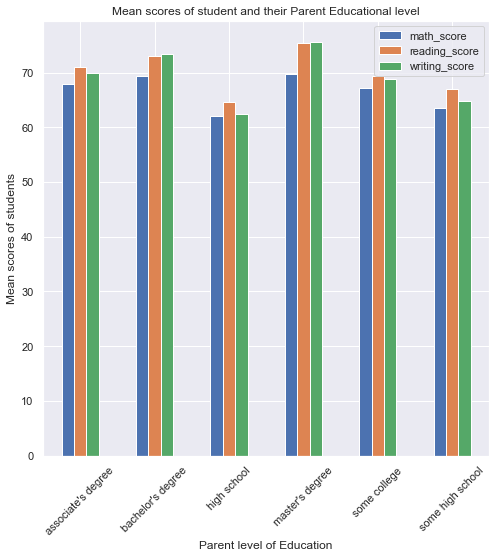

In [10]:
parent_level.plot(kind = 'bar', rot = 45, figsize = (8,8), ylabel = ('Mean scores of students'),
                  xlabel = ('Parent level of Education'), title = ('Mean scores of student and their Parent Educational level'))

I decided to take the analysis further and decided to pivot the scores with lunch and test preparations.

In [11]:
lunch_prep = exam_scores.pivot_table(values = ['math_score', 'reading_score', 'writing_score'], index = ['lunch', 'test_preparation_course'])
lunch_prep

math_score  reading_score  writing_score
lunch        test_preparation_course                                          
free/reduced completed                 63.045802      69.870229      70.351145
             none                      56.508929      61.602679      58.736607
standard     completed                 73.533040      76.215859      76.766520
             none                      68.133971      69.177033      67.595694

After visualizing this, we find out that students who had standard meals and completed test preparations had the highest mean scores
not surprising right?

<AxesSubplot:title={'center':'STUDENTS MEAN SCORE VS LUNCH AND PREPARATION'}, xlabel='Lunch and test prepartion course', ylabel='Mean Scores of students'>

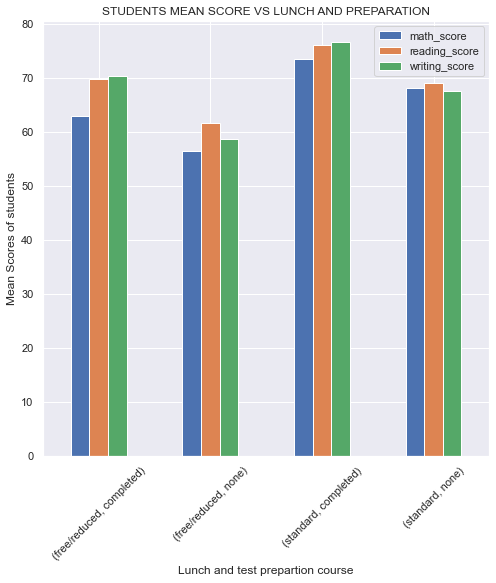

In [12]:
lunch_prep.plot(kind = 'bar', legend= 'bottom', figsize = (8,8), rot = 45, ylabel = ('Mean Scores of students'), 
                xlabel = ('Lunch and test prepartion course'), title = ('STUDENTS MEAN SCORE VS LUNCH AND PREPARATION'))

What happens when we use gender?

In [13]:
scores_by_gender = exam_scores.pivot_table(values = ['math_score', 'reading_score', 'writing_score'], index = 'gender')

In [14]:
scores_by_gender

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


After visualization, we find out the females outperformed the males in reading and writing but not in maths, why?

<AxesSubplot:ylabel='gender'>

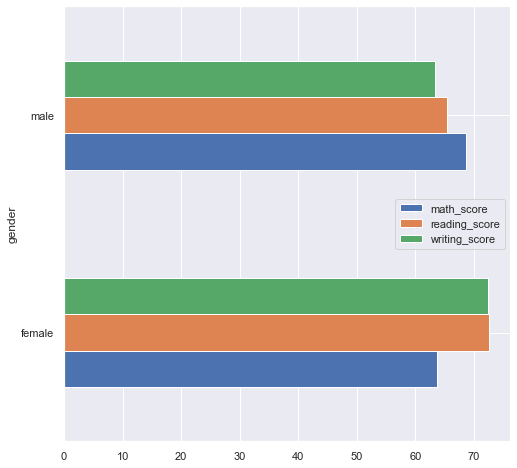

In [15]:
scores_by_gender.plot(kind = 'barh', figsize = (8,8) )

On a quest to try and figure out why, I decided to split the dataset into male and female df and store in a dataframe, but to do that, I first had to convert the long format of the dataset into wide for easy processing and manipulation. Hence the line of code.

In [16]:
exam_edit = exam_scores.melt(id_vars = ['parental_level_of_education', 'gender', 'test_preparation_course'], value_vars = ['math_score', 'reading_score', 'writing_score'], var_name = 'course', value_name = 'scores' )

In [17]:
exam_edit

,parental_level_of_education,gender,test_preparation_course,course,scores
0,bachelor's degree,female,none,math_score,72
1,some college,female,completed,math_score,69
2,master's degree,female,none,math_score,90
3,associate's degree,male,none,math_score,47
4,some college,male,none,math_score,76
...,...,...,...,...,...
2995,master's degree,female,completed,writing_score,95
2996,high school,male,none,writing_score,55
2997,high school,female,completed,writing_score,65
2998,some college,female,completed,writing_score,77


I selected the data which had the gender columns as male and course as math_score only while keeping the parental level of education and test preparation and sorted it according to descending order.

In [18]:
male_df = exam_edit.query('gender == "male" and (course == "math_score")').sort_values(by = 'scores', ascending = False)

I called on the first 10 sorted rows and we can see that male students with the highest score all had their test prep completed  but surprisingly, their parents level of education are not master degrees 

In [19]:
male_df.head(10)

,parental_level_of_education,gender,test_preparation_course,course,scores
625,some college,male,completed,math_score,100
623,some college,male,completed,math_score,100
916,bachelor's degree,male,completed,math_score,100
149,associate's degree,male,completed,math_score,100
306,some college,male,completed,math_score,99
934,associate's degree,male,completed,math_score,98
104,some college,male,completed,math_score,98
286,associate's degree,male,completed,math_score,97
34,some college,male,none,math_score,97
864,associate's degree,male,none,math_score,97


In [20]:
male_pivot = male_df.pivot_table(values = 'scores', index = ['parental_level_of_education']).sort_values(by = 'scores', ascending = False)

When I used the pivot tables, it still tells us that students that their parents had master degrees had the highest mean scores in mathematics despite students with parents educational level = 'some college' had the best individual records.
We notice the same in females too

In [21]:
male_pivot

,scores
parental_level_of_education,
master's degree,74.826087
associate's degree,70.764151
bachelor's degree,70.581818
some college,69.009259
some high school,67.840909
high school,64.705882


In [22]:
female_df = exam_edit.query('gender == "female" and (course == "math_score")').sort_values(by = 'scores', ascending = False)

In [23]:
female_df.head()

,parental_level_of_education,gender,test_preparation_course,course,scores
451,some college,female,none,math_score,100
962,associate's degree,female,none,math_score,100
458,bachelor's degree,female,none,math_score,100
114,bachelor's degree,female,completed,math_score,99
263,high school,female,none,math_score,99


In [24]:
female_pivot = female_df.pivot_table(values = 'scores', index = ['parental_level_of_education']).sort_values(by = 'scores', ascending = False)

In [25]:
female_pivot

,scores
parental_level_of_education,
bachelor's degree,68.349206
master's degree,66.500000
some college,65.406780
associate's degree,65.250000
high school,59.351064
some high school,59.296703


In [26]:
male_pivot

,scores
parental_level_of_education,
master's degree,74.826087
associate's degree,70.764151
bachelor's degree,70.581818
some college,69.009259
some high school,67.840909
high school,64.705882


Notice how the mean math scores for parental level of education is higher in males than females, this explains why males had high scores in maths compared to females.
I visualized the bar graph below.

<AxesSubplot:ylabel='parental_level_of_education'>

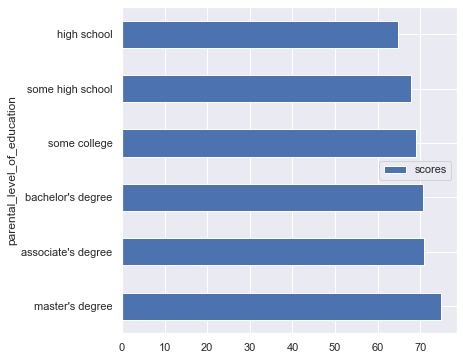

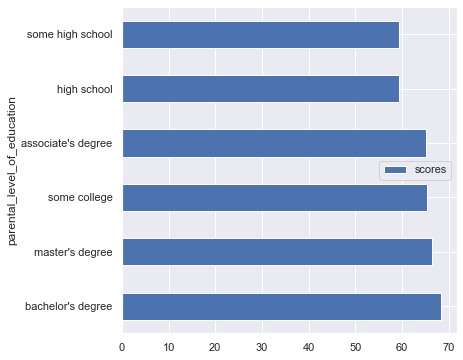

In [27]:
male_pivot.plot(kind = 'barh', figsize = (6,6), ylabel = ('Male Educational level'))
female_pivot.plot(kind = 'barh', figsize = (6,6), ylabel =('Female Educational level'))